# Face Generation

In this project, you'll define and train a DCGAN on a dataset of faces. Your goal is to get a generator network to generate *new* images of faces that look as realistic as possible!

The project will be broken down into a series of tasks from **loading in data to defining and training adversarial networks**. At the end of the notebook, you'll be able to visualize the results of your trained Generator to see how it performs; your generated samples should look like fairly realistic faces with small amounts of noise.

### Get the Data

You'll be using the [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) to train your adversarial networks.

This dataset is more complex than the number datasets (like MNIST or SVHN) you've been working with, and so, you should prepare to define deeper networks and train them for a longer time to get good results. It is suggested that you utilize a GPU for training.

### Pre-processed Data

Since the project's main focus is on building the GANs, we've done *some* of the pre-processing for you. Each of the CelebA images has been cropped to remove parts of the image that don't include a face, then resized down to 64x64x3 NumPy images. Some sample data is show below.

<img src='assets/processed_face_data.png' width=60% />

> If you are working locally, you can download this data [by clicking here](https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5be7eb6f_processed-celeba-small/processed-celeba-small.zip)

This is a zip file that you'll need to extract in the home directory of this notebook for further loading and processing. After extracting the data, you should be left with a directory of data `processed_celeba_small/`

In [1]:
# can comment out after executing
#!unzip processed_celeba_small.zip

In [2]:
data_dir = 'processed_celeba_small/'

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
import problem_unittests as tests
#import helper

%matplotlib inline

## Visualize the CelebA Data

The [CelebA](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations. Since you're going to be generating faces, you won't need the annotations, you'll only need the images. Note that these are color images with [3 color channels (RGB)](https://en.wikipedia.org/wiki/Channel_(digital_image)#RGB_Images) each.

### Pre-process and Load the Data

Since the project's main focus is on building the GANs, we've done *some* of the pre-processing for you. Each of the CelebA images has been cropped to remove parts of the image that don't include a face, then resized down to 64x64x3 NumPy images. This *pre-processed* dataset is a smaller subset of the very large CelebA data.

> There are a few other steps that you'll need to **transform** this data and create a **DataLoader**.

#### Exercise: Complete the following `get_dataloader` function, such that it satisfies these requirements:

* Your images should be square, Tensor images of size `image_size x image_size` in the x and y dimension.
* Your function should return a DataLoader that shuffles and batches these Tensor images.

#### ImageFolder

To create a dataset given a directory of images, it's recommended that you use PyTorch's [ImageFolder](https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder) wrapper, with a root directory `processed_celeba_small/` and data transformation passed in.

In [3]:
# necessary imports
import torch
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader

In [4]:
def get_dataloader(num_workers, batch_size, image_size, data_dir='processed_celeba_small/'):
    """
    Batch the neural network data using DataLoader
    :param batch_size: The size of each batch; the number of images in a batch
    :param img_size: The square size of the image data (x, y)
    :param data_dir: Directory where image data is located
    :return: DataLoader with batched data
    """
    
    # TODO: Implement function and return a dataloader
    transform = transforms.Compose([transforms.Resize(image_size),
                                    transforms.ToTensor()])
    
    image_path = './' + data_dir
    
    train_dataset = datasets.ImageFolder(image_path, transform)
    
    train_loader = DataLoader(dataset = train_dataset, 
                              batch_size = batch_size, 
                              shuffle = True,
                              num_workers = num_workers)
    
    return train_loader


## Create a DataLoader

#### Exercise: Create a DataLoader `celeba_train_loader` with appropriate hyperparameters.

Call the above function and create a dataloader to view images. 
* You can decide on any reasonable `batch_size` parameter
* Your `image_size` **must be** `32`. Resizing the data to a smaller size will make for faster training, while still creating convincing images of faces!

In [5]:
# Define function hyperparameters
batch_size = 64
img_size = 32
num_workers = 0

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# Call your function and get a dataloader
celeba_train_loader = get_dataloader(num_workers, batch_size, img_size)


Next, you can view some images! You should seen square images of somewhat-centered faces.

Note: You'll need to convert the Tensor images into a NumPy type and transpose the dimensions to correctly display an image, suggested `imshow` code is below, but it may not be perfect.

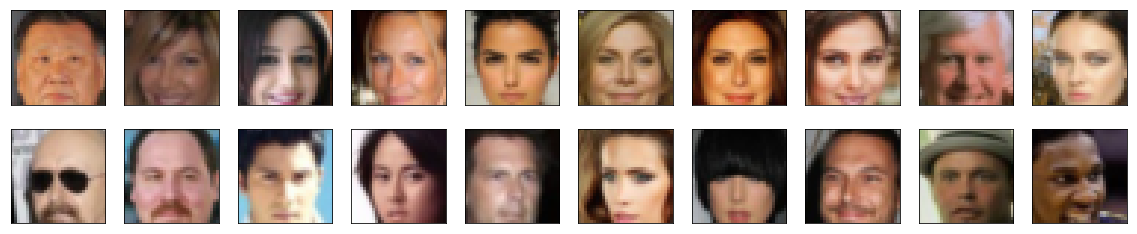

In [6]:
# helper display function
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# obtain one batch of training images
dataiter = iter(celeba_train_loader)
images, _ = dataiter.next() # _ for no labels

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(20, 4))
plot_size=20
for idx in np.arange(plot_size):
    ax = fig.add_subplot(2, plot_size/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])

#### Exercise: Pre-process your image data and scale it to a pixel range of -1 to 1

You need to do a bit of pre-processing; you know that the output of a `tanh` activated generator will contain pixel values in a range from -1 to 1, and so, we need to rescale our training images to a range of -1 to 1. (Right now, they are in a range from 0-1.)

In [7]:
# TODO: Complete the scale function
def scale(x, feature_range=(-1, 1)):
    ''' Scale takes in an image x and returns that image, scaled
       with a feature_range of pixel values from -1 to 1. 
       This function assumes that the input x is already scaled from 0-1.'''
    # assume x is scaled to (0, 1)
    # scale to feature_range and return scaled x
    # assume x is scaled to (0, 1)
    # scale to feature_range and return scaled x
    # obtain one batch of training images
    
    #the generator creates images with pixels in a range from 
    #negative one to one due to a tanh activation function 
    #applied to its outputs. 
    #re-scaling a real training input image x into that range 
    #as well, assuming that the input x is already in a normalized
    #range from zero to one. 
    #Getting a maximum and minimum from my feature range and the 
    #first thing is to multiply the current zero to one range by 
    #a new range. In this case, one minus negative one. 
    
    #The max minus the min is going to give a range of two values.
    #So this will go from the original zero to one to a new range 
    #zero to two and finally, I shift that zero to two range using
    #plus min or plus negative one in this case. 
    #The shifts are ranged to be negative one to one. 
    #Then, return the scaled x.     
    min, max = feature_range
    x = x * (max - min) + min
    
    return x

#In the cell below, printing out the new min and max 
#values for the sample image, the new min is a negative value, 
#close to negative one in fact. 


In [8]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# check scaled range
# should be close to -1 to 1
img = images[0]
scaled_img = scale(img)

print('Min: ', scaled_img.min())
print('Max: ', scaled_img.max())

Min:  tensor(-0.9137)
Max:  tensor(0.8039)


---
# Define the Model

A GAN is comprised of two adversarial networks, a discriminator and a generator.

## Discriminator

Your first task will be to define the discriminator. This is a convolutional classifier like you've built before, only without any maxpooling layers. To deal with this complex data, it's suggested you use a deep network with **normalization**. You are also allowed to create any helper functions that may be useful.

#### Exercise: Complete the Discriminator class
* The inputs to the discriminator are 32x32x3 tensor images
* The output should be a single value that will indicate whether a given image is real or fake


In [9]:
import torch.nn as nn
import torch.nn.functional as F

In [10]:
# helper conv function
def conv(in_channels, out_channels, kernel_size, stride=2, padding=1, batch_norm=True):
    """Creates a convolutional layer, with optional batch normalization
    A helper function is used to put these layers together, this function 
    which is named conv for convolutional layers, takes in the same 
    parameters as a typical convolutional layer with one additional 
    parameter, batch_norm which is a Boolean variable true or false. 
    Then, based on these past time parameters, it creates a sequential 
    series of one or two layers, a strided convolutional layer and an 
    optional batch norm layer. A Pytorch sequential container is used for 
    the creation of these layers. The sequential container, takes in a 
    list of layers and creates layers according to the order that they're 
    passed in to the sequential container.    
    """
    #creating an empty list named layers, to hold a list of layers
    layers = [] 
    
    #defining a strided convolutional layer. Passing in all the relevant 
    #parameters, input and output channels, kernel size stride and padding 
    #and bias is set to false, so that these layers are not offset by any 
    #amount. Pretty typical for a strided convolutional layer, The default 
    #parameters are set accordingly, a kernel size of four, stride of two 
    #and padding of one will ensure that each strided convolutional layer
    #down-samples it's input by a factor of two in the X and Y dimensions. 
    #So, with the kernel size of four and stride two if this layer sees a 
    #32 by 32 images input, it will output a 16 by 16 image.
    conv_layer = nn.Conv2d(in_channels, out_channels, kernel_size, 
                           stride, padding, bias=False)
    
    #appending that convolutional layer to the list of layers.
    layers.append(conv_layer)
    
    #If the batch norm parameter is set to true, which is the default 
    #here in the function definition, I will add a batch norm layer on 
    #the output of our convolutional layer. I can do this with a call to
    #BatchNorm2D and pass in the number of outputs it should operate on,
    #a number of output channels. In the same line, I'm adding this to 
    #the list of layers. If batch normis set to false, it will not enter
    #this if statement and it won't add a BatchNorm2D layer. 
    if batch_norm:
        #append batchnorm layer
        layers.append(nn.BatchNorm2d(out_channels))
        
    #Using PyTorches sequential wrapper which takes in the list of 
    #layers and this will return those layers, whether it's one 
    #convolutional layer or a convolutional layer and a batch norm layer.    
    return nn.Sequential(*layers)

<img src='my_diagrams/conv_discriminator.png' width=60% />
The shape of the input image as it goes through these convolutional layers. It starts out as a 32 by 32 image and after it goes through each of these strided convolutional layers, it will reduce in spatial size by a factor of two. So, it goes from 32 by 32 to 16 by 16, eight-by-eight and after the third convolutional layer, four-by-four.

Now, if you look at the diagram, this is going to look like a four-by-four convolutional layer with a depth of conv_dim times four, which is 128. At the end of these convolutional layers, I know I also need to smash these outputs and feed them to a final fully connected layer that will output just one value that indicates whether an input image is real or fake.

In [11]:
class Discriminator(nn.Module):

    def __init__(self, conv_dim):
        """
        Initialize the Discriminator Module
        :param conv_dim: The depth of the first convolutional layer
        
        three convolutinal layers that increase the depth as the image moves forward
        intial depth defined by conv_dim
        batch norm function is applied using the helper function above 
        and Leaky ReLu activations function is applied in the forward function
        At the end of the strided convolutional layers, fully connected layer 
        returnw the discriminator logits.
        """
        super(Discriminator, self).__init__()
        
        #comlete init function
        #saving my past in confident parameter because it will 
        #need to be referenced this later,        
        self.conv_dim = conv_dim

        #defining three strided convolutional layers using 
        #the conv helper function from above.
        
        #conv() Recall, that this function takes in the usual convolutional 
        #layer parameters with a default stride equal to two and padding 
        #equal to one. It also has a batch norm parameter that defaults 
        #to true and this defines whether or not we add a batch norm 
        #layer to the outputs of our strided convolution layer.
        
        #The first started convolutional layer is seeing an image as input
        #and each image from the Celeb Faces dataset and each generated 
        #image should have a depth of three, one for each color channel, 
        #RGB and this is producing conv_dim m number of filtered output 
        #images, in this case, 32. You'll also note that I'm using a 
        #kernel size of four and in the case of the first layer, there 
        #was no batch norm layer applied to the outputs of the strided 
        #convolutional layer. The parameter batch norm is set to false.
        # 32x32 input
        self.conv1 = conv(3, conv_dim, 4, batch_norm=False) # first layer, no batch_norm
        
        #The second convolutional layer, conv2, is also using the helper 
        #function, again just increasing the depth of these layers from 
        #conv_dim to conv_dim times two. Sending a kernel size to four 
        #again and without any additional parameters, leaving the batch 
        #norm parameter to its default value which is true.
        # 16x16 out
        self.conv2 = conv(conv_dim, conv_dim*2, 4)
        
        #Doing the same thing for the third convolutional layer only 
        #increasing the depth by a factor of two once more. 
        # 8x8 out
        self.conv3 = conv(conv_dim*2, conv_dim*4, 4)
        # 4x4 out
        
        #Creating a final fully connected layer fc that sees every 
        #single output value from the last convolutional layer. 
        #At the end we have a four-by-four image and a depth of 
        #conv_dim times four. So, this is how many inputs this 
        #layer should see and it produces one value as output. 
        # final, fully-connected layer
        self.fc = nn.Linear(conv_dim*4*4*4, 1)
        
    def forward(self, x):
        """
        Forward propagation of the neural network
        :param x: The input to the neural network     
        :return: Discriminator logits; the output of the neural network
        """
        #Parse an input x through all these layers. 
        #Parsing x through the convolutional layers one at a time.

        #Applying a leaky_relu activation function 
        #to each of these outputs with a 
        #negative slope value of 0.2.
        
        # define feedforward behavior
        # all hidden layers + leaky relu activation
        out = F.leaky_relu(self.conv1(x), 0.2)
        out = F.leaky_relu(self.conv2(out), 0.2)
        out = F.leaky_relu(self.conv3(out), 0.2)
        
        #After going through these layers, the output has to be flattened 
        #the output from the final convolutional layer, which I am doing 
        #using out dot view negative one and then the number of flattened 
        #inputs I expect. Again, this is the four-by-four image times 
        #the depth of that last layer. Then, it is feed this flattened 
        #output into the last fully connected layer and return that output. 
        #There is no activation function here and so this should give the 
        #discriminator logits. A sigmoid activation function is applied 
        #later on when the loss is calculated between these logits and 
        #some target real or fake labels.
        # flatten
        out = out.view(-1, self.conv_dim*4*4*4)
        
        # final output layer
        out = self.fc(out)
        
        return out



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(Discriminator)

Tests Passed


<img src='my_diagrams/conv_generator.png' width=60% />

Here's the general structure of the generator. The input will be a noise vector Z, the output will be a tanh activated output. This time the output should be of size 32 by 32 by three, which is the size of the CelebFaces Attributes Dataset training images. The diagram shows z going from a depth of 128 to 64 then 32 and finally a depth of three for our output generated image. Because transpose convolutional layers are used, there is no need to reshape a vector output into an image, these layers output the exact shape, needed.

The generator sees a latent vector Z as input, then the first layer is going to be a fully connected layer which is responsible for turning that vector into many outputs. The goal is to have enough outputs to reshape the output of this linear layer into a deep and narrow layer, something like four by four by 128. This is the reverse process of what was done in the discriminator. After the output of the linear layer is shaped, next is a series of transpose convolutional layers, where the depth typically doubles and the width and height maintain the dimensions of the previous layer. Batch normalization and a normal ReLU activation are applied to all but the last of these hidden layers. At the end of the last layer, a tanh activation is applied to get the pixel values. Three transpose convolutional layers are used. 

The transpose convolutional layers will mostly have the same behavior, a transpose convolutional layer, followed by a batch norm layer and a ReLU activation function. The deconv helper function is defined below to put the layers together. Similar to the conv function above, making the discriminator and generator class code a little more readable.

## Generator

The generator should upsample an input and generate a *new* image of the same size as our training data `32x32x3`. This should be mostly transpose convolutional layers with normalization applied to the outputs.

#### Exercise: Complete the Generator class
* The inputs to the generator are vectors of some length `z_size`
* The output should be a image of shape `32x32x3`

In [12]:
# helper deconv function
def deconv(in_channels, out_channels, kernel_size, stride=2, padding=1, batch_norm=True):
    """Creates a transposed-convolutional layer, 
    with optional batch normalization.
    This deconv helper function, creates a transpose convolutional 
    layer and append a batch norm layer if the batch norm parameter
    here is true.  
    
    kernel size of four, a stride of two are used and a pattern 
    of one to effectively upsample any input by a factor of two 
    in the x and y dimensions. 
    """
    #Creating a shortlist of layers using patriotic sequential 
    #wrapper to return these as a complete module. 

    # create a sequence of transpose + optional batch norm layers
    layers = []
    #defining a transpose convolutional layer using the past and 
    #parameters.
    transpose_conv_layer = nn.ConvTranspose2d(in_channels, out_channels, 
                                              kernel_size, stride, padding, bias=False)
    # append transpose convolutional layer
    #Append this transpose convolutional layer to the list of 
    #layers. 

    layers.append(transpose_conv_layer)
    
    #Address the batch norm case. If the batch norm parameter is 
    #true which is the default, create a batch norm layer which 
    #will be applied to the outputs of my transpose convolutional 
    #layer. If the batch norm parameter is false, it's not going 
    #to add anything more to the list of layers. 
    if batch_norm:
        # append batchnorm layer
        layers.append(nn.BatchNorm2d(out_channels))
        
    #Finally, using the sequential wrapper to group the layers 
    #together and return them as a module that can be used in the 
    #generator class definition below. 
    return nn.Sequential(*layers)

In [13]:
class Generator(nn.Module):
    
    def __init__(self, z_size, conv_dim):
        """
        Initialize the Generator Module
        :param z_size: The length of the input latent vector, z
        :param conv_dim: The depth of the inputs to the *last* transpose convolutional layer
        
        A Generator class takes in a conv_dim, which should be the depth of one of the last
        transpose convolutional layers.
        
        The generator will see a latent vector z as input. Then the first step will be to put this through a fully connected layer that gives  enough outputs to reshape into a deep and small layer.

        Create a four by four by 128 layer from these linear 
        outputs, and choosing 128 to shrink this in half with 
        two more layers to 64 then 32 eventually. 
        So, with this goal in mind, the linear layer will produce
        four by four by 128 outputs.
        """
        super(Generator, self).__init__()

        # complete init function
        self.conv_dim = conv_dim
        
        # first, fully-connected layer
        #First fully connected layer, takes in a latent vector z as an 
        #input and produces a desired number of outputs. 
        #This number of outputs is defined by the goal of reshaping z 
        #into a four by four by 128 layer. Four by four and then a 
        #conv_dim which is 32 by four which is 128. 
        self.fc = nn.Linear(z_size, conv_dim*4*4*4)

        # transpose conv layers
        #Defining three transpose convolutional layers. 
        #Three layers are used since the goal is to get from a 
        #size of four-by-four to the desired output image size of 
        #32 by 32.
        
        #As the inputs moves through these layers. It starts as a 
        #four-by-four shape, then after the first layer, it will 
        #become eight by eight, then 16 by 16 and finally 32 by 32. 
        #The helper functioned is used to go from deep layers and 
        #decreasing depth as more and more transpose convolutions 
        #are created.
        
        #Going from a depth of conv-dim times four to conv-dim 
        #times two, to finally conv-dim and finally three. Using 
        #a kernel size of four for each of these and allowing a 
        #batch norm layer to be applied to all but the last 
        #transpose convolutional layer. 
        
        #For the final layer, the desired spatial size of 32 by 32
        #and the desired depth which is going to be an output of 
        #three for an RGB image. 
        self.t_conv1 = deconv(conv_dim*4, conv_dim*2, 4)
        self.t_conv2 = deconv(conv_dim*2, conv_dim, 4)
        self.t_conv3 = deconv(conv_dim, 3, 4, batch_norm=False)
        

    def forward(self, x):
        """
        Forward propagation of the neural network
        :param x: The input to the neural network     
        :return: A 32x32x3 Tensor image as output
        """
        # define feedforward behavior
        # fully-connected + reshape 
        
        #passing my input x which will actually 
        #be a vector z through the first linear layer.
        out = self.fc(x)
        
        #This is going to produce a desired number of outputs 
        #that will then be reshaped. 
        #So, let's look at each of these dimensions. 
        
        #The negative one is going to be a place holder 
        #for a batch size.
        
        #Then they have some depth that's defined by convolutional 
        #dimension, in this case, this will be the value 128. 
        #Finally, the width and height which are just going to be
        #four by four is achieved. 
        #Proceed with passing this v-shaped output to the 
        #transpose convolutional layers and passing it in 
        #sequence to the first second transpose convolutional 
        #layers and applying a normal relu activation function.
        
        out = out.view(-1, self.conv_dim*4, 4, 4) # (batch_size, depth, 4, 4)
        
        # hidden transpose conv layers + relu
        out = F.relu(self.t_conv1(out))
        out = F.relu(self.t_conv2(out))
        
        #Finally, passing this output to the third transpose c
        #onvolutional layer, and applying a tan h activation on 
        #this last output. So, this returned output should be a 
        #generated image that's 32 by 32 by three in shape and with 
        #pixel values in a range from negative one to one.
        
        # last layer + tanh activation
        out = self.t_conv3(out)
        out = F.tanh(out)
        
        return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(Generator)

Tests Passed


## Initialize the weights of your networks

To help your models converge, you should initialize the weights of the convolutional and linear layers in your model. From reading the [original DCGAN paper](https://arxiv.org/pdf/1511.06434.pdf), they say:
> All weights were initialized from a zero-centered Normal distribution with standard deviation 0.02.

So, your next task will be to define a weight initialization function that does just this!

You can refer back to the lesson on weight initialization or even consult existing model code, such as that from [the `networks.py` file in CycleGAN Github repository](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix/blob/master/models/networks.py) to help you complete this function.

#### Exercise: Complete the weight initialization function

* This should initialize only **convolutional** and **linear** layers
* Initialize the weights to a normal distribution, centered around 0, with a standard deviation of 0.02.
* The bias terms, if they exist, may be left alone or set to 0.

In [14]:
def weights_init_normal(m, init_type='normal', init_gain=0.02):
    """
    Applies initial weights to certain layers in a model .
    The weights are taken from a normal distribution 
    with mean = 0, std dev = 0.02.
    :param m: A module or layer in a network    
    """
    # classname will be something like:
    # `Conv`, `BatchNorm2d`, `Linear`, etc.
    classname = m.__class__.__name__
    
    # TODO: Apply initial weights to convolutional and linear layers
    if hasattr(m, 'weight') and (classname.find('Conv') != -1 or classname.find('Linear') != -1):
        if init_type == 'normal':
            nn.init.normal_(m.weight.data, 0.0, init_gain)
        elif init_type == 'xavier':
            nn.init.xavier_normal_(m.weight.data, gain=init_gain)
        elif init_type == 'kaiming':
            nn.init.kaiming_normal_(m.weight.data, a=0, mode='fan_in')
        elif init_type == 'orthogonal':
            nn.init.orthogonal_(m.weight.data, gain=init_gain)
        else:
            raise NotImplementedError('initialization method [%s] is not implemented' % init_type)
        if hasattr(m, 'bias') and m.bias is not None:
            nn.init.constant_(m.bias.data, 0.0)
    elif classname.find('BatchNorm2d') != -1:  # BatchNorm Layer's weight is not a matrix; only normal distribution applies.
        nn.init.normal_(m.weight.data, 1.0, init_gain)
        nn.init.constant_(m.bias.data, 0.0)

    print('initialized network with %s' % init_type)
    

## Build complete network

Define your models' hyperparameters and instantiate the discriminator and generator from the classes defined above. Make sure you've passed in the correct input arguments.

In [15]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
def build_network(d_conv_dim, g_conv_dim, z_size):
    # define discriminator and generator
    D = Discriminator(d_conv_dim)
    G = Generator(z_size=z_size, conv_dim=g_conv_dim)

    # initialize model weights
    D.apply(weights_init_normal)
    G.apply(weights_init_normal)

    print(D)
    print()
    print(G)
    
    return D, G


#### Exercise: Define model hyperparameters

In [16]:
# Define model hyperparams
d_conv_dim = 64
g_conv_dim = 256
z_size = 100 #generator linear layer

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
D, G = build_network(d_conv_dim, g_conv_dim, z_size)

initialized network with normal
initialized network with normal
initialized network with normal
initialized network with normal
initialized network with normal
initialized network with normal
initialized network with normal
initialized network with normal
initialized network with normal
initialized network with normal
initialized network with normal
initialized network with normal
initialized network with normal
initialized network with normal
initialized network with normal
initialized network with normal
initialized network with normal
initialized network with normal
initialized network with normal
initialized network with normal
Discriminator(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): Sequential(
    

### Training on GPU

Check if you can train on GPU. Here, we'll set this as a boolean variable `train_on_gpu`. Later, you'll be responsible for making sure that 
>* Models,
* Model inputs, and
* Loss function arguments

Are moved to GPU, where appropriate.

In [17]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import torch

# Check for a GPU
train_on_gpu = torch.cuda.is_available()
if not train_on_gpu:
    print('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Training on GPU!')

Training on GPU!


---
## Discriminator and Generator Losses

Now we need to calculate the losses for both types of adversarial networks.

### Discriminator Losses

> * For the discriminator, the total loss is the sum of the losses for real and fake images, `d_loss = d_real_loss + d_fake_loss`. 
* Remember that we want the discriminator to output 1 for real images and 0 for fake images, so we need to set up the losses to reflect that.


### Generator Loss

The generator loss will look similar only with flipped labels. The generator's goal is to get the discriminator to *think* its generated images are *real*.

#### Exercise: Complete real and fake loss functions

**You may choose to use either cross entropy or a least squares error loss to complete the following `real_loss` and `fake_loss` functions.**

In [18]:
"""
utilize a real and fake loss to check whether the discriminator
outputs are close to the ground truth real labels or fake labels. 
       
Using binary cross entropy with logits loss, this combines a 
sigmoid activation function and a binary cross entropy loss 
in one function. 

So, these two functions will return a different types of discriminator losses. 
"""

def real_loss(D_out, smooth=False):
    '''Calculates how close discriminator outputs are to being real.
       param, D_out: discriminator logits
       return: real loss'''
    batch_size = D_out.size(0)
    
    #the output of the discriminator (D_out.squeeze()) 
    #is compared agianst the ground truth labels (labels)
    #that are defined.
    
    #These are either going to be ones or smooth real labels 0.9

    # label smoothing
    if smooth:
        # smooth, real labels = 0.9
        labels = torch.ones(batch_size)*0.9
    else:
        labels = torch.ones(batch_size) # real labels = 1
        
    #If we are training on GPU, will actually want to move 
    #these labels to GPU.
    # move labels to GPU if available     
    if train_on_gpu:
        labels = labels.cuda()
    # binary cross entropy with logits loss
    criterion = nn.BCEWithLogitsLoss()
    # calculate loss
    loss = criterion(D_out.squeeze(), labels)
    return loss

def fake_loss(D_out):
    '''Calculates how close discriminator outputs are to being fake.
       param, D_out: discriminator logits
       return: fake loss'''
    
    #Then we have the same behavior for our fake loss function. 
    #Comparing the output of the discriminator (D_out.squeeze())
    #to labels that are set equal to zero (labels = torch.zeros(batch_size)),
    #BCE with logit loss is used to compare these two values. 
    
    batch_size = D_out.size(0)
    labels = torch.zeros(batch_size) # fake labels = 0
    
    #moving label to gpu if available
    if train_on_gpu:
        labels = labels.cuda()
    criterion = nn.BCEWithLogitsLoss()
    # calculate loss
    loss = criterion(D_out.squeeze(), labels)
    return loss

## Optimizers

#### Exercise: Define optimizers for your Discriminator (D) and Generator (G)

Define optimizers for your models with appropriate hyperparameters.

In [19]:
import torch.optim as optim

# params
lr = 0.0002
beta1=0.5
beta2=0.999 # default value

# Create optimizers for the discriminator D and generator G
d_optimizer = optim.Adam(D.parameters(), lr, [beta1, beta2])
g_optimizer = optim.Adam(G.parameters(), lr, [beta1, beta2])

---
## Training

Training will involve alternating between training the discriminator and the generator. You'll use your functions `real_loss` and `fake_loss` to help you calculate the discriminator losses.

* You should train the discriminator by alternating on real and fake images
* Then the generator, which tries to trick the discriminator and should have an opposing loss function


#### Saving Samples

You've been given some code to print out some loss statistics and save some generated "fake" samples.

#### Exercise: Complete the training function

Keep in mind that, if you've moved your models to GPU, you'll also have to move any model inputs to GPU.

In [20]:
def train(D, G, n_epochs, print_every=50):
    '''Trains adversarial networks for some number of epochs
       param, D: the discriminator network
       param, G: the generator network
       param, n_epochs: number of epochs to train for
       param, print_every: when to print and record the models' losses
       return: D and G losses'''
    
    # move models to GPU
    if train_on_gpu:
        D.cuda()
        G.cuda()

    # keep track of loss and generated, "fake" samples
    samples = []
    losses = []

    # Get some fixed data for sampling. These are images that are held
    # constant throughout training, and allow us to inspect the model's performance
    sample_size=16
    fixed_z = np.random.uniform(-1, 1, size=(sample_size, z_size))
    fixed_z = torch.from_numpy(fixed_z).float()
    # move z to GPU if available
    if train_on_gpu:
        fixed_z = fixed_z.cuda()

    # epoch training loop
    for epoch in range(n_epochs):

        # batch training loop
        for batch_i, (real_images, _) in enumerate(celeba_train_loader):

            batch_size = real_images.size(0)
            real_images = scale(real_images)

            # ===============================================
            #         YOUR CODE HERE: TRAIN THE NETWORKS
            # ===============================================
           
            
            # ============================================
            #            TRAIN THE DISCRIMINATOR
            # ============================================
            # 1. Train the discriminator on real and fake images
            #The discriminator will alternate between training on 
            #real images and fake images that were generated by our 
            #generator. Notice that label smoothing is not used because 
            #this works a little better without smoothing. 
            
            #1. train with real images
            d_optimizer.zero_grad()
            
            # 1. Train with real images
            # Compute the discriminator losses on real images
            if train_on_gpu:
                real_images = real_images.cuda()
        
            D_real = D(real_images)
            #the discriminator wants to classify real images as real 
            #with are real loss. 
            d_real_loss = real_loss(D_real)
        
            # 2. Train with fake images
        
            # Generate fake images
            z = np.random.uniform(-1, 1, size=(batch_size, z_size))
            z = torch.from_numpy(z).float()
            
            # move x to GPU, if available
            if train_on_gpu:
                z = z.cuda()
                
            fake_images = G(z)
        
            # Compute the discriminator losses on fake images            
            D_fake = D(fake_images)
            #the discriminator wants to classify  fake images as 
            #fake with a fake loss 
            d_fake_loss = fake_loss(D_fake)
        
            #adding real and fake losses and perform
            #backpropagation and optimization.
            d_loss = d_real_loss + d_fake_loss
            d_loss.backward()
            d_optimizer.step()
            
            # =========================================
            #            TRAIN THE GENERATOR
            # =========================================
            # 2. Train the generator with an adversarial loss
            #g_loss = 
            g_optimizer.zero_grad()
        
            # 1. Train with fake images and flipped labels
        
            # Generate fake images
            #Creating a leaner vector z of some batch_size and z-size,
            #and then moving that to GPU and passing that to the 
            #generator to create some fake images,
            z = np.random.uniform(-1, 1, size=(batch_size, z_size))
            z = torch.from_numpy(z).float()
            if train_on_gpu:
                z = z.cuda()
            fake_images = G(z)
        
            # Compute the discriminator losses on fake images 
            # using flipped labels!
            #looking at the output of the discriminator and seeing 
            #if it's classifying these fake images as real. 
            D_fake = D(fake_images)
            g_loss = real_loss(D_fake) # use real loss to flip labels
        
            # perform backprop
            g_loss.backward()
            g_optimizer.step()

            
        #G.eval() - evaluation mode is really only important if there is
        #batch norm or drop out layers, which are designed to have 
        #different behavior during training and testing. 
        #For example, dropout should not turn off any nodes when a 
        #model is being tested or evaluated. In batch norm   
        #the population statistics is used rather than the 
        #batch statistics as it does during training. 
       
        #G.train() - After I generate some samples I put our generator back to training mode.

            
            # ===============================================
            #              END OF YOUR CODE
            # ===============================================

            # Print some loss stats
            if batch_i % print_every == 0:
                # append discriminator loss and generator loss
                losses.append((d_loss.item(), g_loss.item()))
                # print discriminator and generator loss
                print('Epoch [{:5d}/{:5d}] | d_loss: {:6.4f} | g_loss: {:6.4f}'.format(
                        epoch+1, n_epochs, d_loss.item(), g_loss.item()))


        ## AFTER EACH EPOCH##    
        # this code assumes your generator is named G, feel free to change the name
        # generate and save sample, fake images
        G.eval() # for generating samples
        samples_z = G(fixed_z)
        samples.append(samples_z)
        G.train() # back to training mode

    # Save training generator samples
    with open('train_samples.pkl', 'wb') as f:
        pkl.dump(samples, f)
    
    # finally return losses
    return losses

Set your number of training epochs and train your GAN!

In [21]:
# set number of epochs 
n_epochs = 25


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# call training function
losses = train(D, G, n_epochs=n_epochs)

Epoch [    1/   25] | d_loss: 1.7047 | g_loss: 1.0103
Epoch [    1/   25] | d_loss: 0.5085 | g_loss: 5.3433
Epoch [    1/   25] | d_loss: 1.2167 | g_loss: 5.8496
Epoch [    1/   25] | d_loss: 1.0092 | g_loss: 2.0717
Epoch [    1/   25] | d_loss: 0.9665 | g_loss: 1.5226
Epoch [    1/   25] | d_loss: 0.6135 | g_loss: 1.2715
Epoch [    1/   25] | d_loss: 1.3582 | g_loss: 2.2868
Epoch [    1/   25] | d_loss: 1.1174 | g_loss: 1.8016
Epoch [    1/   25] | d_loss: 1.0332 | g_loss: 1.3624
Epoch [    1/   25] | d_loss: 1.0863 | g_loss: 1.5036
Epoch [    1/   25] | d_loss: 0.5884 | g_loss: 1.6574
Epoch [    1/   25] | d_loss: 1.3466 | g_loss: 1.6033
Epoch [    1/   25] | d_loss: 1.8435 | g_loss: 2.0486
Epoch [    1/   25] | d_loss: 0.9978 | g_loss: 1.0094
Epoch [    1/   25] | d_loss: 0.6060 | g_loss: 2.0133
Epoch [    1/   25] | d_loss: 0.6157 | g_loss: 1.9071
Epoch [    1/   25] | d_loss: 1.0551 | g_loss: 1.4725
Epoch [    1/   25] | d_loss: 0.5626 | g_loss: 1.8140
Epoch [    1/   25] | d_loss

## Training loss

Plot the training losses for the generator and discriminator, recorded after each epoch.

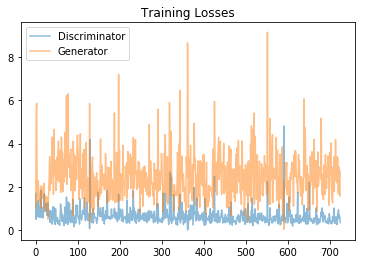

In [22]:
fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='Discriminator', alpha=0.5)
plt.plot(losses.T[1], label='Generator', alpha=0.5)
plt.title("Training Losses")
plt.legend()

## Generator samples from training

View samples of images from the generator, and answer a question about the strengths and weaknesses of your trained models.

In [23]:
# helper function for viewing a list of passed in sample images
def view_samples(epoch, samples):
    fig, axes = plt.subplots(figsize=(16,4), nrows=2, ncols=8, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples[epoch]):
        img = img.detach().cpu().numpy()
        img = np.transpose(img, (1, 2, 0))
        img = ((img + 1)*255 / (2)).astype(np.uint8)
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(img.reshape((32,32,3)))

In [24]:
# Load samples from generator, taken while training
with open('train_samples.pkl', 'rb') as f:
    samples = pkl.load(f)

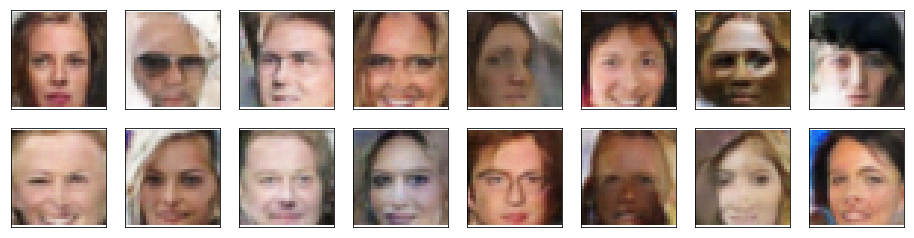

In [25]:
_ = view_samples(-1, samples)

## Hyper-parameter Tunning

After the first iteration of running with the following paramteres the for 25 epochs, it was clear that the Generator could use a bit more power since its loss was decreasing at the same rate as the discriminator. 
## Test1:
* d_conv_dim = 32
* g_conv_dim = 32
* batch_size = 128
<img src='my_diagrams/1_d_conv_dim32_g_conv_dim32_batch_size_32.png' width=40% />

<img src='my_diagrams/1_d_conv_dim32_g_conv_dim32_batch_size_32_faces.png' width=80% />



After running the second test with the huperparamters below below It was clear that tunning the hyperparameters made a big difference so another test was done increasing the power of the discriminator so see the outcome
## Test2:
* d_conv_dim = 32
* g_conv_dim = 128
* batch_size = 64

<img src='my_diagrams/2_d_conv_dim32_g_conv_dim128_batch_size_64.png' width=40% />

<img src='my_diagrams/2_d_conv_dim32_g_conv_dim128_batch_size_64_faces.png' width=80% /> 



It turns out that the previous ratio between the discriminator and generator results in a better outcome. So another test was done to see if a bigger model with the same ratio results in a better outcome.
## Test3:
* d_conv_dim = 64
* g_conv_dim = 128
* batch_size = 64
<img src='my_diagrams/3_d_conv_dim64_g_conv_dim128_batch_size_64.png' width=40% />

<img src='my_diagrams/3_d_conv_dim64_g_conv_dim128_batch_size_64_faces.png.png' width=80% />



## Test4:
* g_conv_dim = 64
* g_conv_dim = 256
* batch_size = 64

Results above

### Question: What do you notice about your generated samples and how might you improve this model?
When you answer this question, consider the following factors:
* The dataset is biased; it is made of "celebrity" faces that are mostly white
* Model size; larger models have the opportunity to learn more features in a data feature space
* Optimization strategy; optimizers and number of epochs affect your final result


**Answer:** 

The generated samples look interesting but some of faces are not recognizable, the model can be improved by adding additional layers so that it can extract more features. Another improvement can be using a larger data-set of faces not only including white celebrities. Lastly, although the ADAM optimizer is preferred for DCGAN models, another optimization can be using SGD for the Discriminator and ADAM for the generator as suggested by [sousmith](https://github.com/soumith/ganhacks). The other improvemnet that can be implemented is the concepts covered in the [wgans paper](https://arxiv.org/pdf/1701.07875.pdf)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "problem_unittests.py" files in your submission.